In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [7]:
with open('../data/demonstration_3d_center_out.pkl', 'rb') as fp:
    episodes = pickle.load(fp)

In [8]:
neutral_position = np.array([3.84396701e-02, -2.19447219e-12, 1.97400143e-01])

In [51]:
episodes_to_explore = episodes[:100]

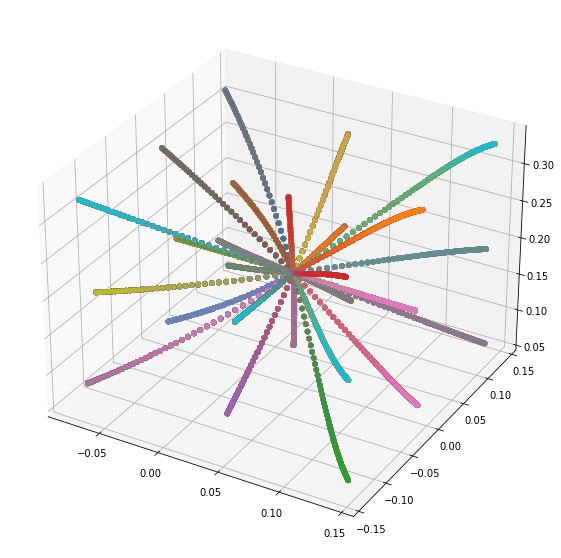

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for episode in episodes_to_explore:
    ee_positions = np.array(
        [step['previous_observation']['achieved_goal'] for step in episode])
    ax.scatter(ee_positions[:, 0], ee_positions[:, 1], ee_positions[:, 2])
    
plt.show()

In [58]:
goals = set(tuple(episode[0]['previous_observation']['desired_goal']) for episode in episodes_to_explore)
goals = sorted(list(goals), key=lambda g: (-g[2], -g[1], g[0]))

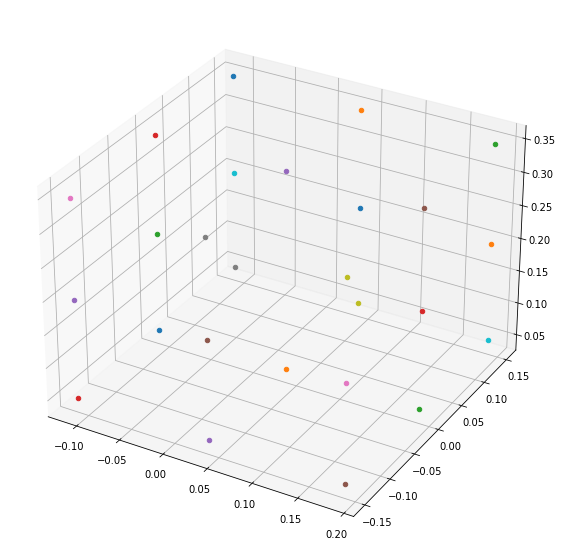

In [59]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for goal in goals:
    ax.scatter(goal[0], goal[1], goal[2])

In [60]:
from collections import defaultdict

episodes_by_goal = defaultdict(list)
for episode in episodes_to_explore:
    goal = tuple(episode[0]['previous_observation']['desired_goal'])
    episodes_by_goal[goal].append(episode)

In [61]:
goals

[(-0.1115603298898189, 0.14999999999780553, 0.3474001434958959),
 (0.0384396701101811, 0.14999999999780553, 0.3474001434958959),
 (0.1884396701101811, 0.14999999999780553, 0.3474001434958959),
 (-0.1115603298898189, -2.194472194883551e-12, 0.3474001434958959),
 (0.0384396701101811, -2.194472194883551e-12, 0.3474001434958959),
 (0.1884396701101811, -2.194472194883551e-12, 0.3474001434958959),
 (-0.1115603298898189, -0.15000000000219446, 0.3474001434958959),
 (0.0384396701101811, -0.15000000000219446, 0.3474001434958959),
 (0.1884396701101811, -0.15000000000219446, 0.3474001434958959),
 (-0.1115603298898189, 0.14999999999780553, 0.19740014349589585),
 (0.0384396701101811, 0.14999999999780553, 0.19740014349589585),
 (0.1884396701101811, 0.14999999999780553, 0.19740014349589585),
 (-0.1115603298898189, -2.194472194883551e-12, 0.19740014349589585),
 (0.1884396701101811, -2.194472194883551e-12, 0.19740014349589585),
 (-0.1115603298898189, -0.15000000000219446, 0.19740014349589585),
 (0.03843

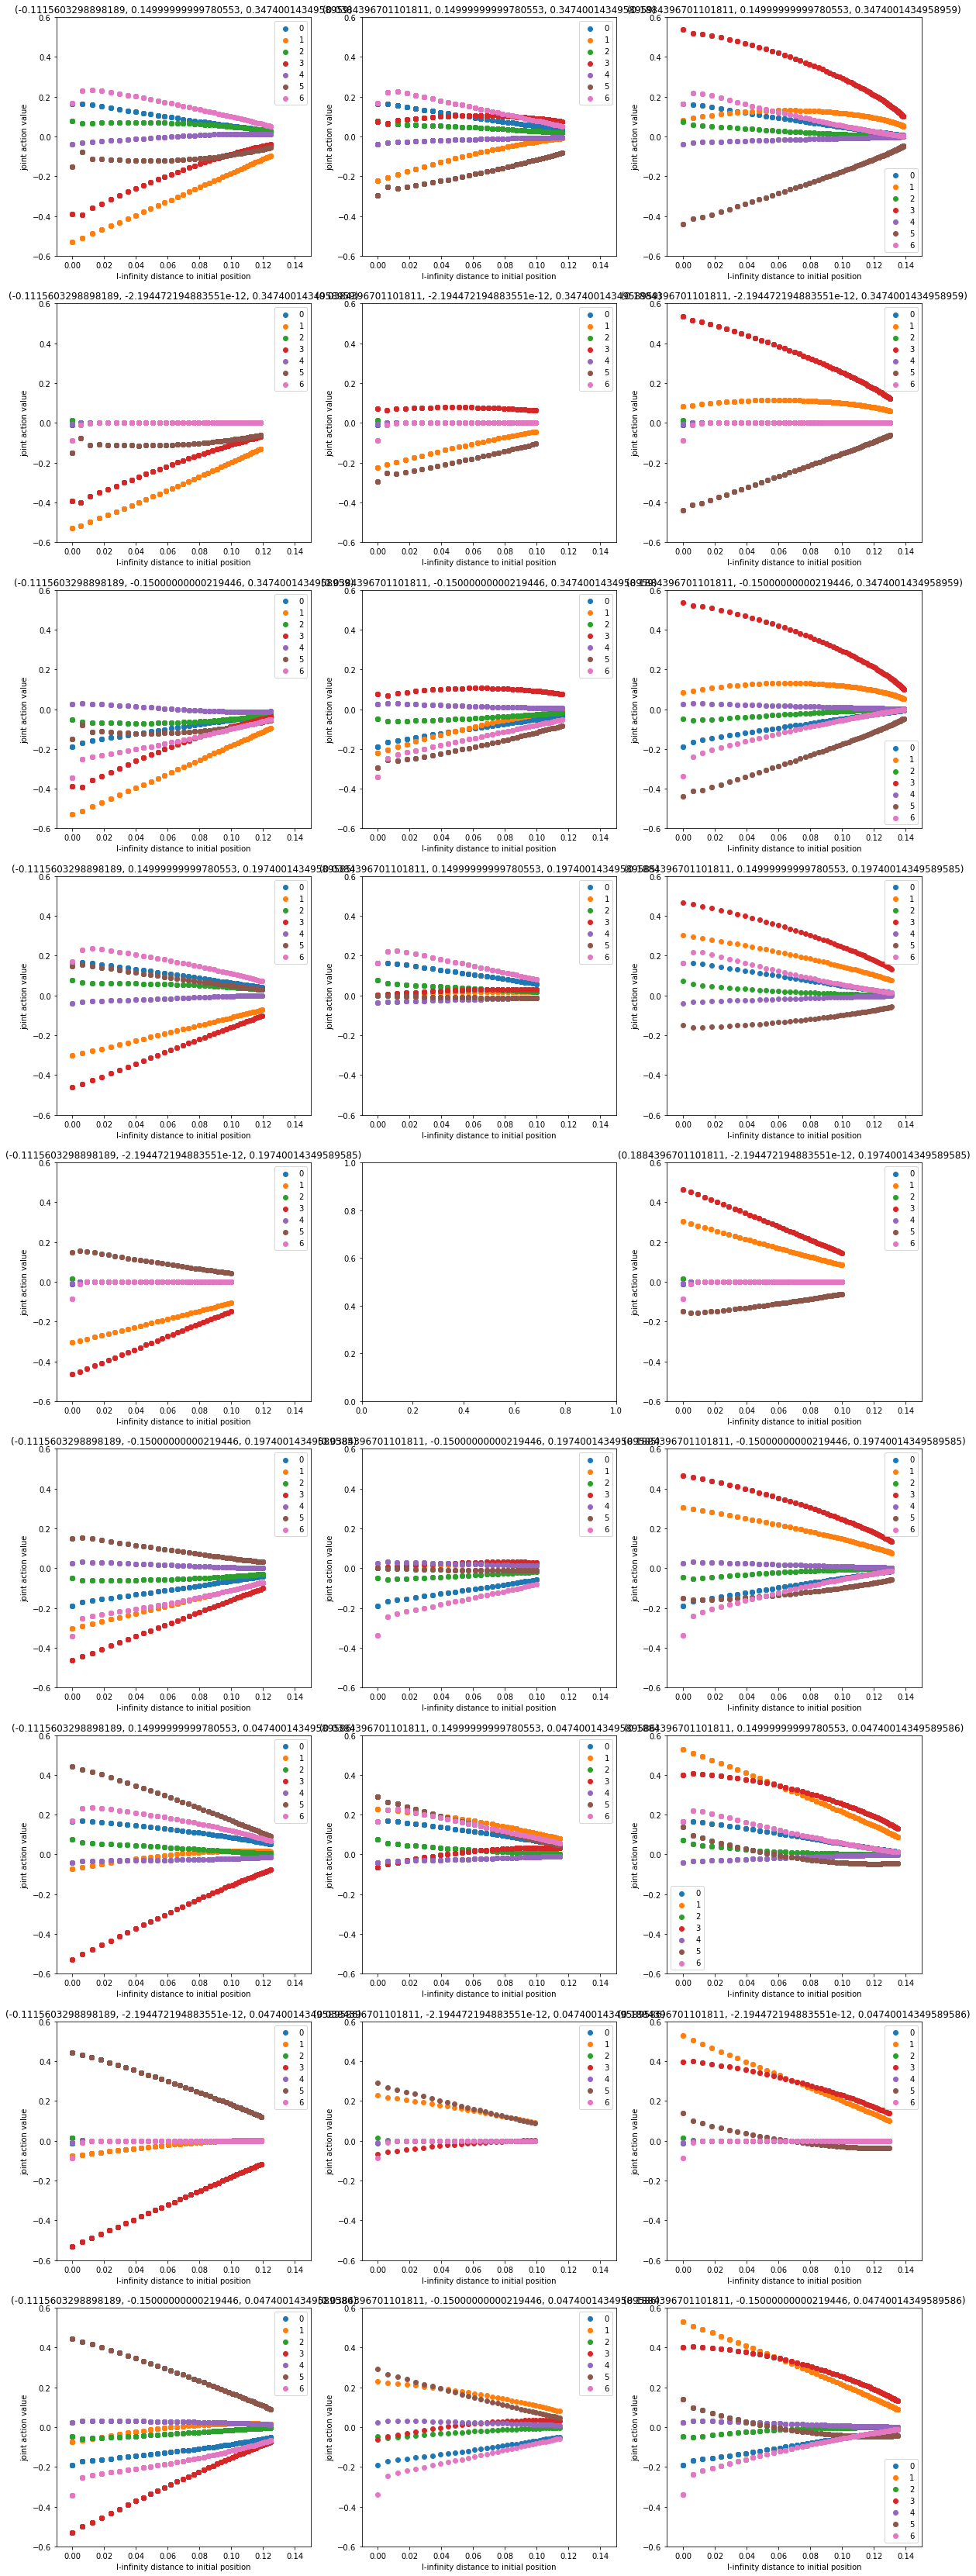

In [70]:
fig, axs = plt.subplots(9, 3, figsize=(20, 60))

for i, goal in enumerate(goals):
    if i >= 13:
        i += 1 # offset for visualization
    
    for joint_id in range(7):
        axs[i // 3, i % 3].scatter(
            [step['radius'] for episode in episodes_by_goal[goal] for step in episode], 
            [step['action_joints'][joint_id] for episode in episodes_by_goal[goal] for step in episode], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_title(goal)
    axs[i // 3, i % 3].set_xlabel('l-infinity distance to initial position')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-.01, .15)
    axs[i // 3, i % 3].set_ylim(-.6, .6)

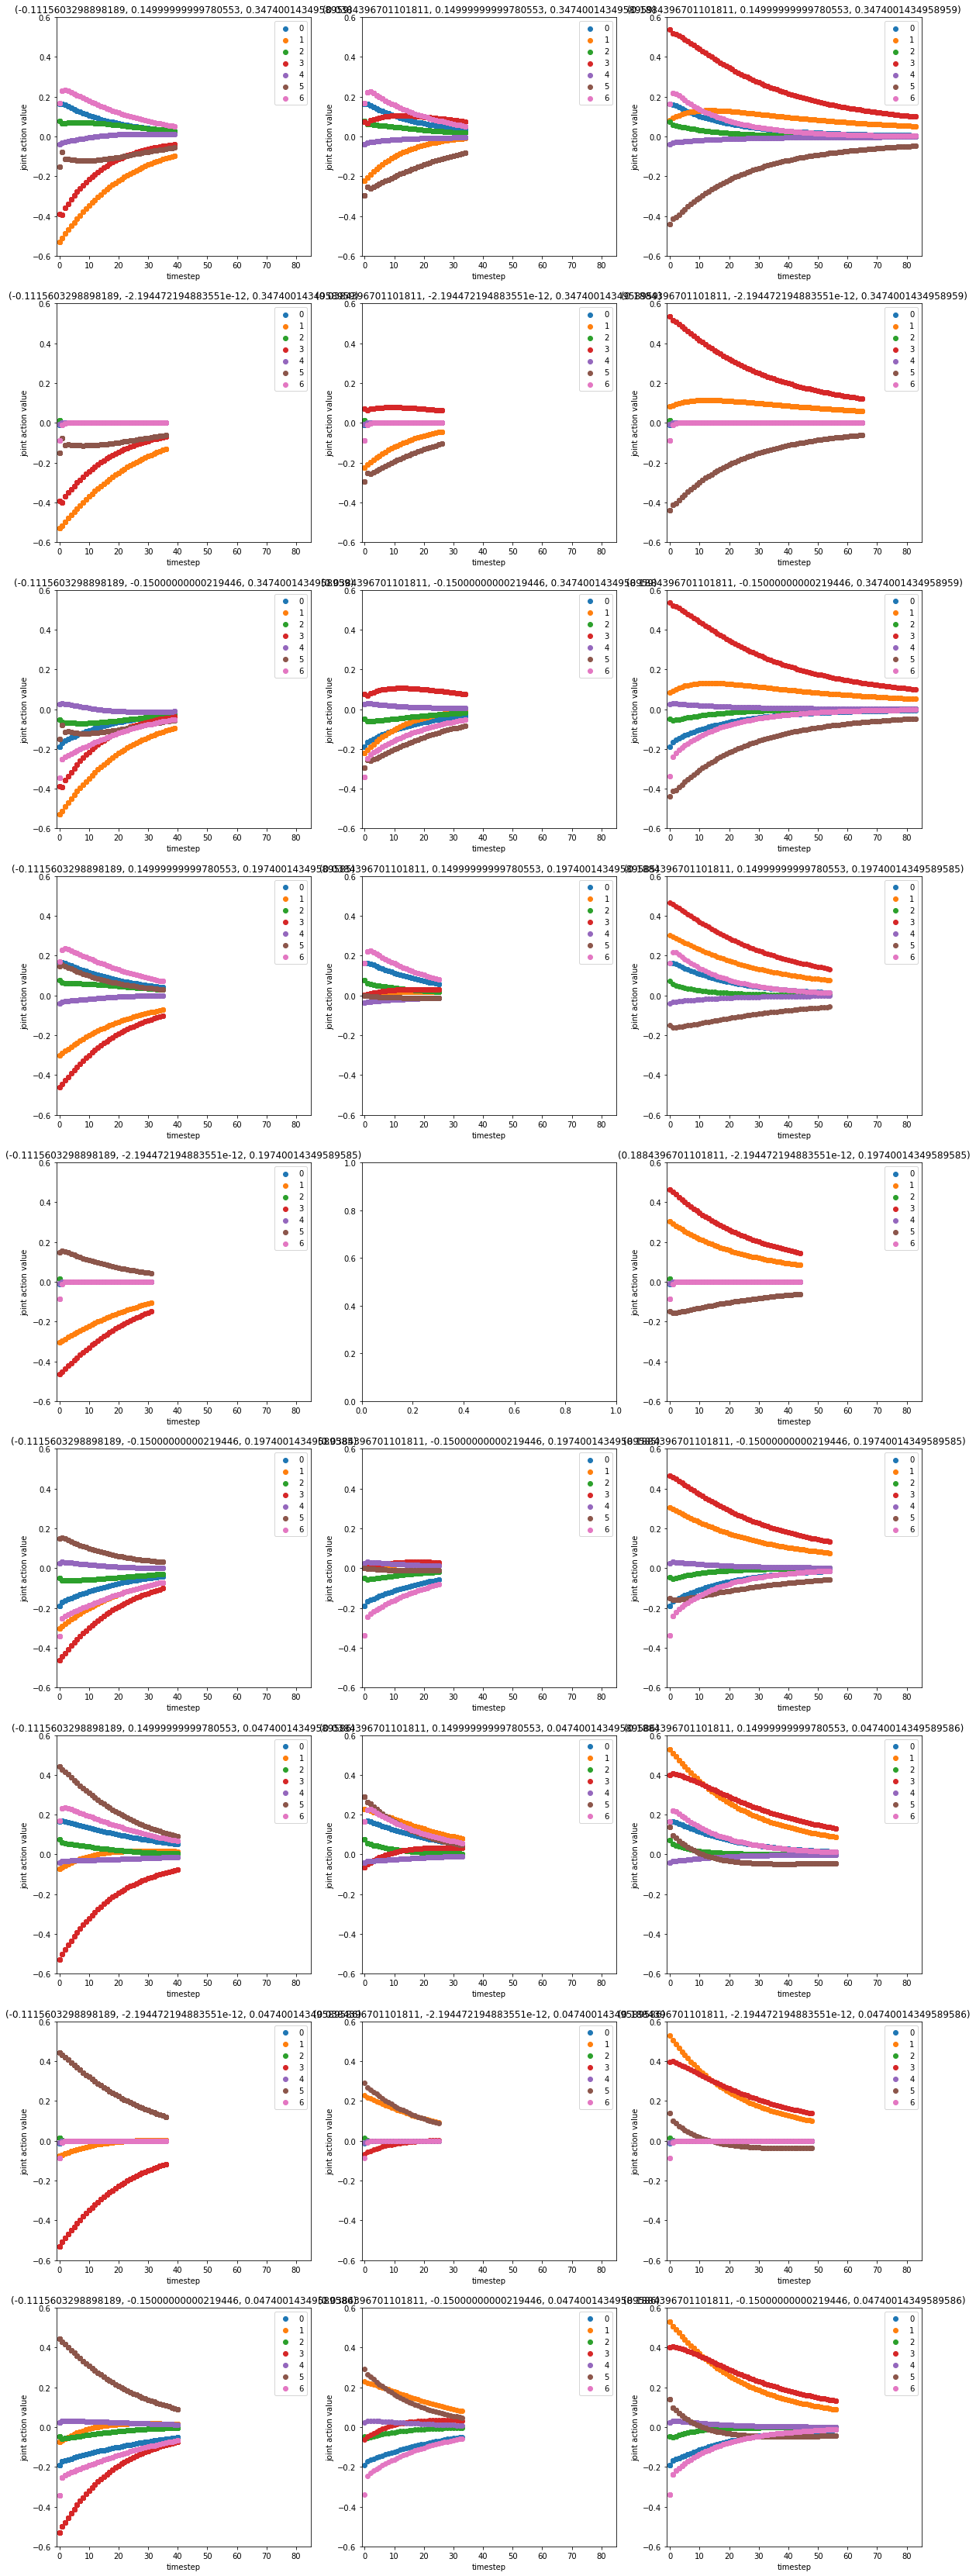

In [75]:
fig, axs = plt.subplots(9, 3, figsize=(20, 60))

for i, goal in enumerate(goals):
    if i >= 13:
        i += 1 # offset for visualization
    
    for joint_id in range(7):
        axs[i // 3, i % 3].scatter(
            [i for episode in episodes_by_goal[goal] for i, _ in enumerate(episode)], 
            [step['action_joints'][joint_id] for episode in episodes_by_goal[goal] for step in episode], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_title(goal)
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-1, 85)
    axs[i // 3, i % 3].set_ylim(-.6, .6)

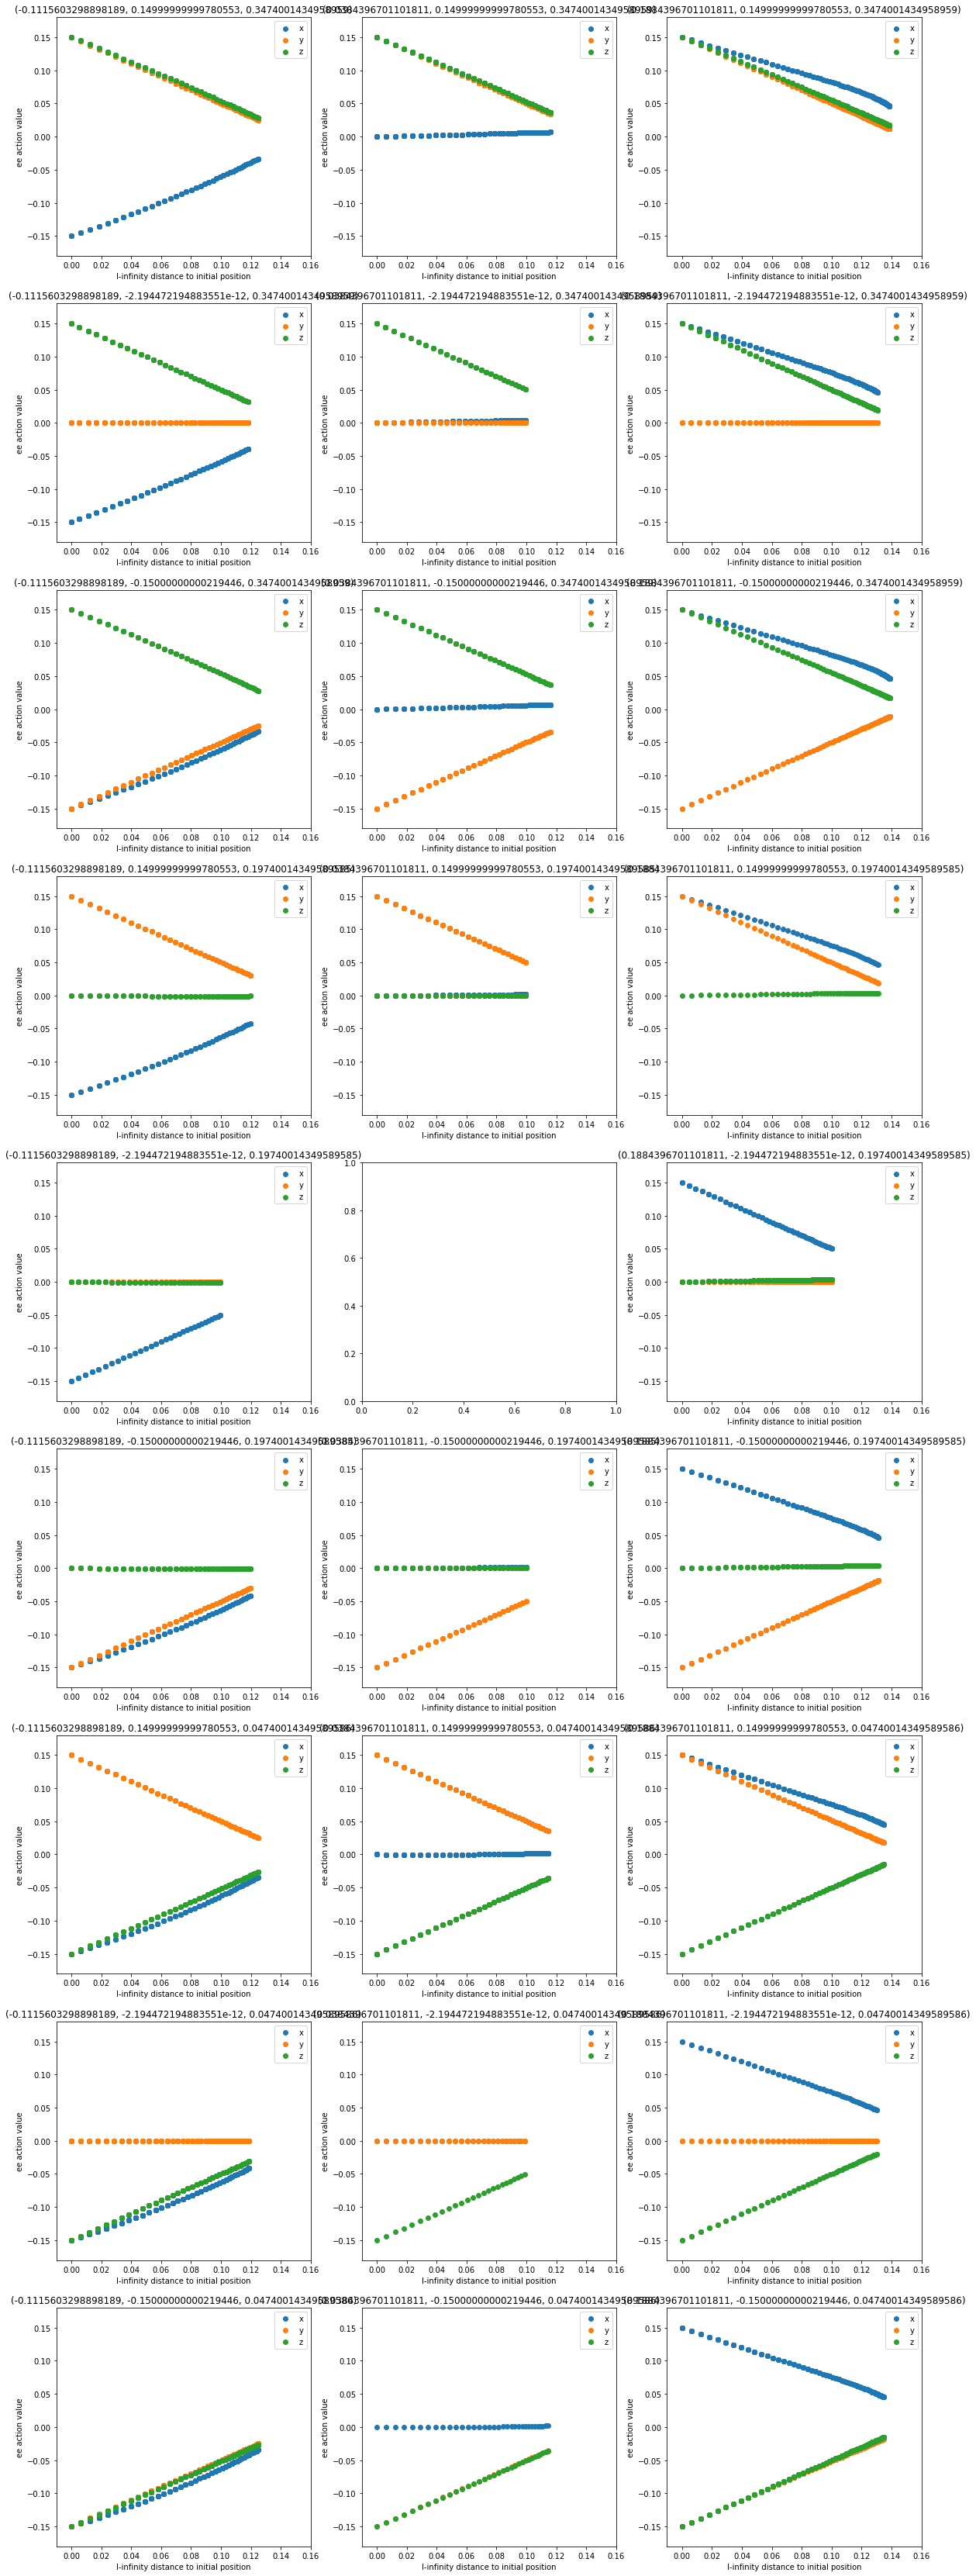

In [77]:
fig, axs = plt.subplots(9, 3, figsize=(20, 60))

for i, goal in enumerate(goals):
    if i >= 13:
        i += 1 # offset for visualization
    
    axs[i // 3, i % 3].scatter(
        [step['radius'] for episode in episodes_by_goal[goal] for step in episode], 
        [step['action_ee'][0] for episode in episodes_by_goal[goal] for step in episode], 
        label='x')
    axs[i // 3, i % 3].scatter(
        [step['radius'] for episode in episodes_by_goal[goal] for step in episode], 
        [step['action_ee'][1] for episode in episodes_by_goal[goal] for step in episode], 
        label='y')
    axs[i // 3, i % 3].scatter(
        [step['radius'] for episode in episodes_by_goal[goal] for step in episode], 
        [step['action_ee'][2] for episode in episodes_by_goal[goal] for step in episode], 
        label='z')
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_title(goal)
    axs[i // 3, i % 3].set_xlabel('l-infinity distance to initial position')
    axs[i // 3, i % 3].set_ylabel('ee action value')
    axs[i // 3, i % 3].set_xlim(-.01, .16)
    axs[i // 3, i % 3].set_ylim(-.18, .18)

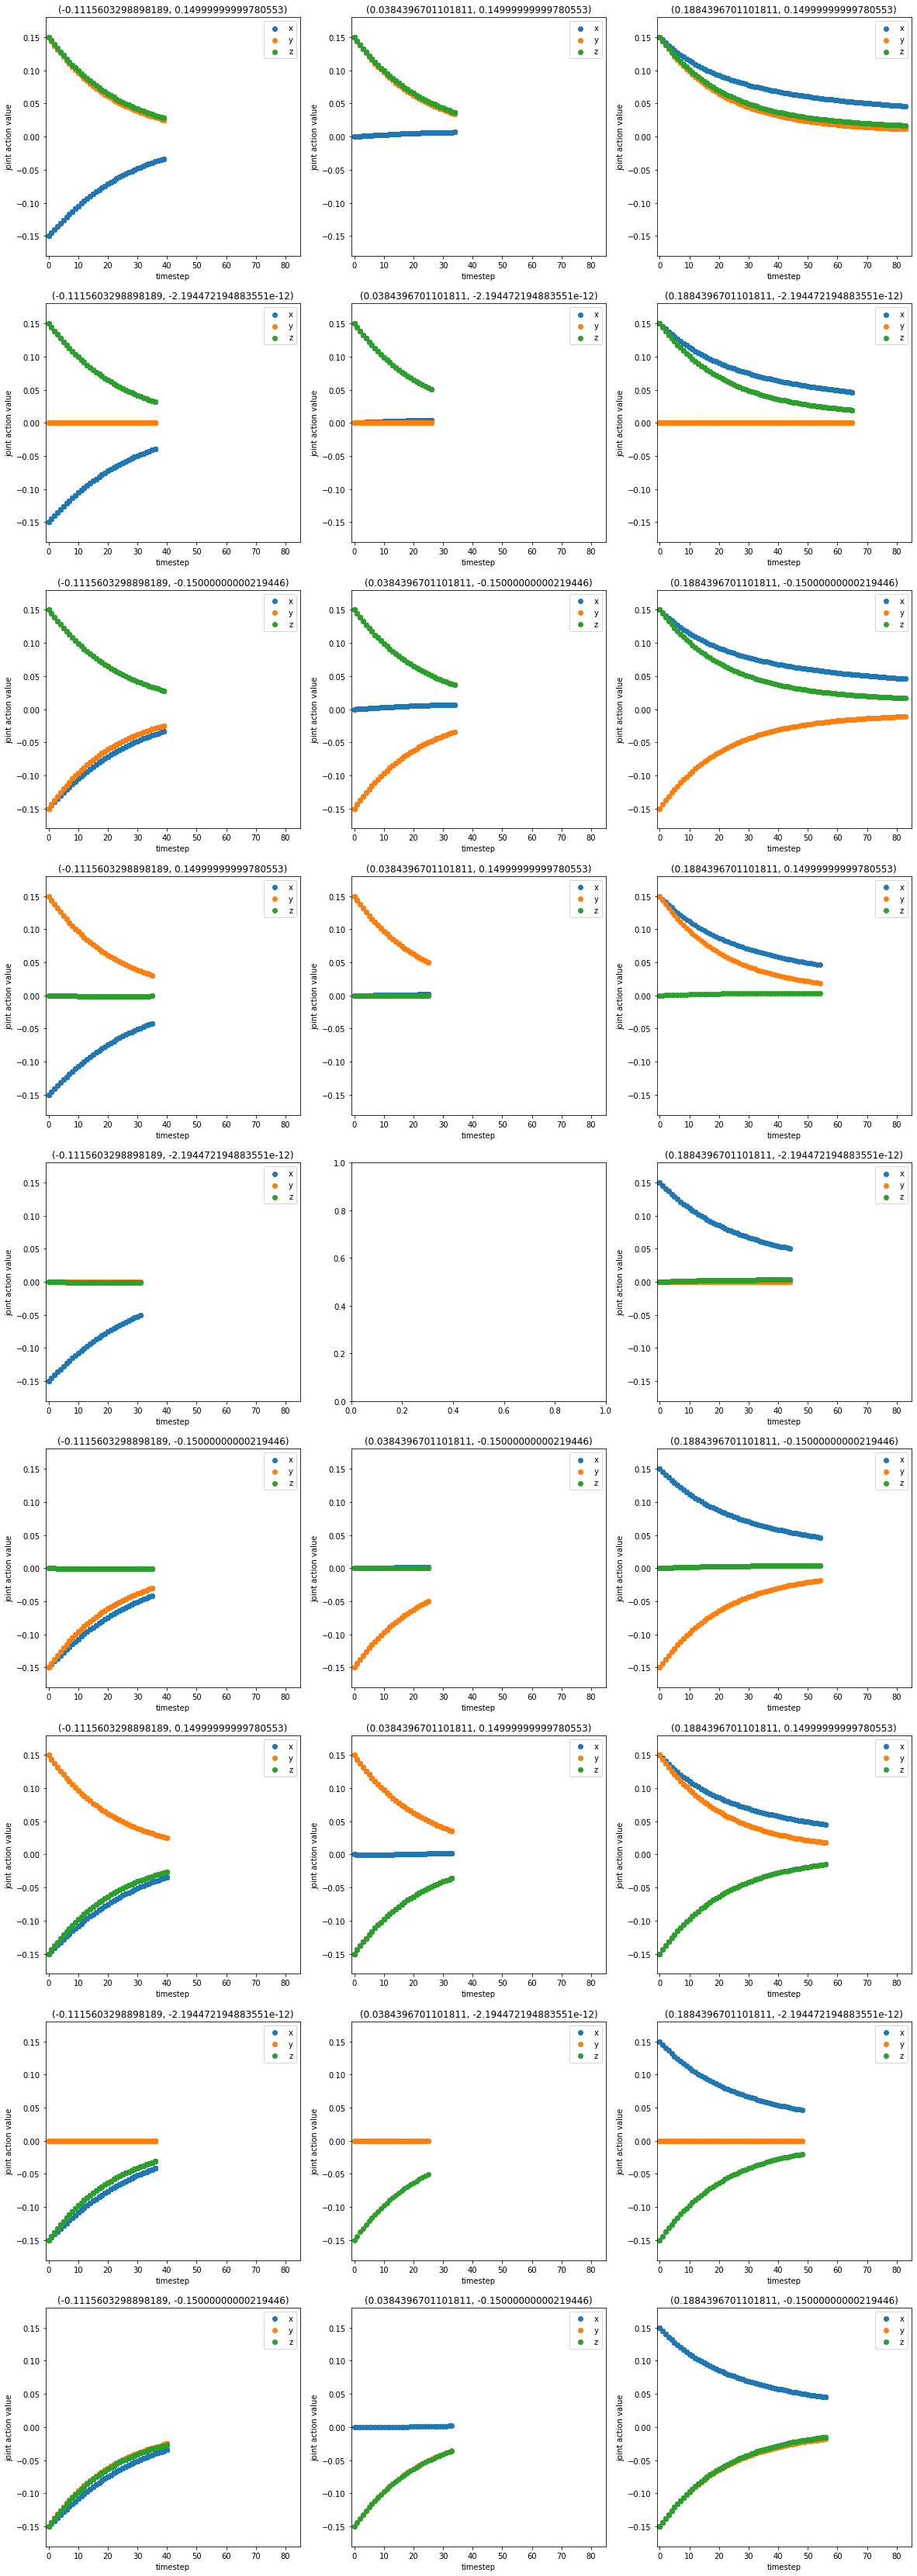

In [80]:
fig, axs = plt.subplots(9, 3, figsize=(20, 60))

for i, goal in enumerate(goals):
    if i >= 13:
        i += 1 # offset for visualization
    
    axs[i // 3, i % 3].scatter(
        [i for episode in episodes_by_goal[goal] for i, _ in enumerate(episode)], 
        [step['action_ee'][0] for episode in episodes_by_goal[goal] for step in episode], 
        label='x')
    axs[i // 3, i % 3].scatter(
        [i for episode in episodes_by_goal[goal] for i, _ in enumerate(episode)], 
        [step['action_ee'][1] for episode in episodes_by_goal[goal] for step in episode], 
        label='y')
    axs[i // 3, i % 3].scatter(
        [i for episode in episodes_by_goal[goal] for i, _ in enumerate(episode)], 
        [step['action_ee'][2] for episode in episodes_by_goal[goal] for step in episode], 
        label='z')
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_title(goal[:2])
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-1, 85)
    axs[i // 3, i % 3].set_ylim(-.18, .18)

In [81]:
actions_joints = np.array([step['action_joints'] for epi in episodes for step in epi])

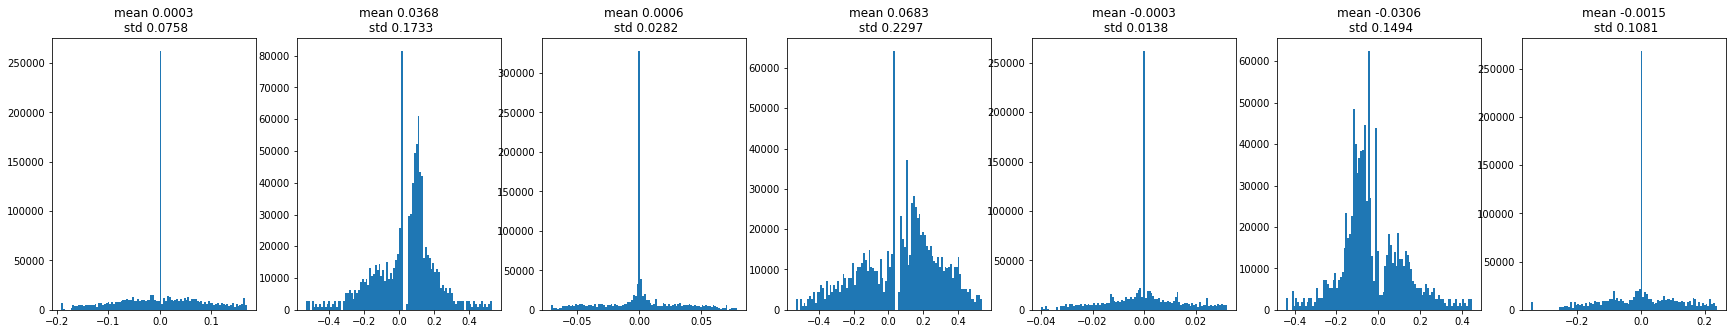

In [82]:
fig, axs = plt.subplots(1, 7, figsize=(30, 5))
for i in range(7):
    axs[i].hist(actions_joints[:, i], bins=100)
    mu = np.around(np.mean(actions_joints[:, i]), 4)
    sig = np.around(np.std(actions_joints[:, i]), 4)
    axs[i].set_title(f'mean {mu}\n std {sig}')